# ESCUELA POLITECNICA NACIONAL
## FACULTAD: INGENIERÍA EN SISTEMAS
## Nombre: Ana Capa

## Tema: Suicidios
### Objetivos: 
#### - Observar el indice de suicidos a nivel mundial.
#### - Conocer los países en los cuales el suicidio tiene mayor   presencia.
#### - Obtener el genero con el mayor número de suicidios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [6]:
path = "./datasuicidios.csv"

In [7]:
lista = pd.read_csv(
        path
        )

In [8]:
lista = lista.sort_values('year')
lista = lista.reset_index(drop=True)

In [9]:
lista

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Saint Vincent and Grenadines,1985,male,35-54 years,2,6100,32.79,Saint Vincent and Grenadines1985,NaN,"145,641,704",1622,Silent
1,Saint Vincent and Grenadines,1985,female,55-74 years,0,4100,0.00,Saint Vincent and Grenadines1985,NaN,"145,641,704",1622,G.I. Generation
2,Saint Vincent and Grenadines,1985,female,75+ years,0,1000,0.00,Saint Vincent and Grenadines1985,NaN,"145,641,704",1622,G.I. Generation
3,Saint Vincent and Grenadines,1985,male,15-24 years,0,12100,0.00,Saint Vincent and Grenadines1985,NaN,"145,641,704",1622,Generation X
4,Saint Vincent and Grenadines,1985,male,25-34 years,0,9300,0.00,Saint Vincent and Grenadines1985,NaN,"145,641,704",1622,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Croatia,2016,male,35-54 years,146,571003,25.57,Croatia2016,NaN,"51,338,524,831",12905,Generation X
27816,Netherlands,2016,female,15-24 years,35,1025443,3.41,Netherlands2016,NaN,"777,227,541,581",48108,Millenials
27817,Netherlands,2016,female,25-34 years,65,1043372,6.23,Netherlands2016,NaN,"777,227,541,581",48108,Millenials
27818,Czech Republic,2016,female,75+ years,25,480884,5.20,Czech Republic2016,NaN,"195,305,084,919",19505,Silent


In [10]:
lista_primeros = lista.filter(items = ["country","year"]).sort_values('country', ascending=False).head(10)

Text(0, 0.5, 'Suicidios')

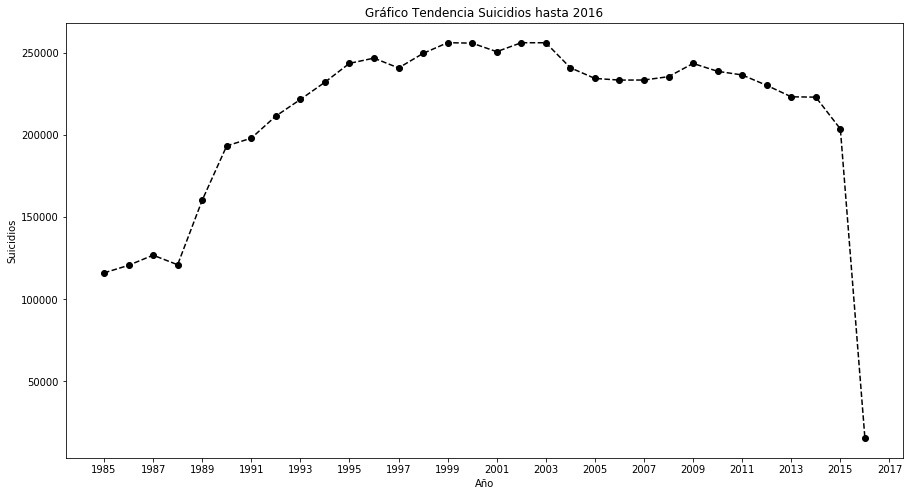

In [24]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(lista.groupby(['year']).suicides_no.sum(),'ko--')
tick = ax.set_xticks(range(1985,2018,2))
ax.set_title('Gráfico Tendencia Suicidios hasta 2016')
ax.set_xlabel('Año')
ax.set_ylabel('Suicidios')

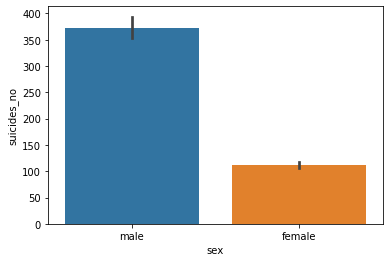

In [12]:
p = sns.barplot(x='sex', y='suicides_no', data=lista)

### Estadístico por sexo y edad

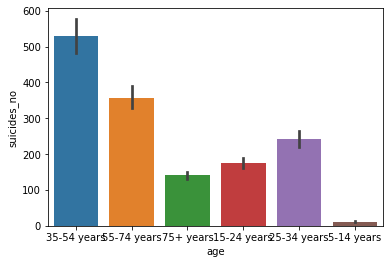

In [14]:
q = sns.barplot(x='age', y='suicides_no', data=lista)

### Estadístico de suicidios por género

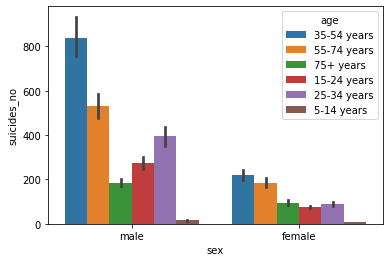

In [18]:
p = sns.barplot(x='sex', y='suicides_no', hue='age', data=lista)

### Estadístico con número de suicidos por año y por rango de edad

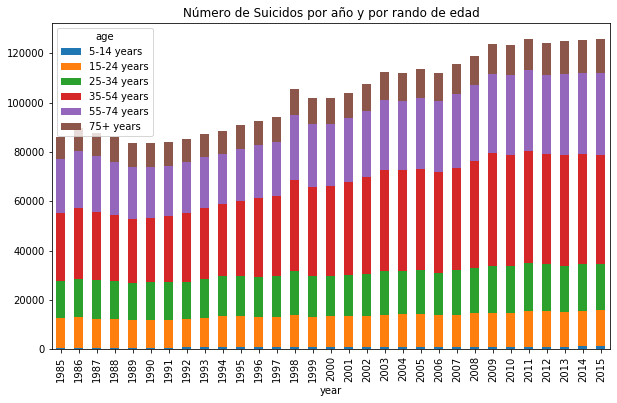

In [19]:
def count_year(group):
    return len(group.year.unique())
country_o = lista.groupby('country').apply(count_year).sort_values(ascending = False)
country_o.name = 'occurances of country'
nmaster = lista[~ (lista.year == 2016)].drop(['HDI for year','country-year','suicides/100k pop'],axis = 1)
coun_year = lista.groupby('country-year').population.sum()
ncountry_o = nmaster.groupby('country').apply(count_year).sort_values(ascending = False)
ncountry_o[country_o >= 30] 
pmaster = nmaster[nmaster.country.isin(ncountry_o[country_o >= 31].index)]
age_group = pd.pivot_table(pmaster,index=['year'],values='suicides_no',columns=['age'],aggfunc=np.sum)
sui_age=age_group[['5-14 years','15-24 years', '25-34 years', '35-54 years','55-74 years', '75+ years']]
sui_age.plot(kind = 'bar',figsize=(10,6),stacked=True,title='Número de Suicidos por año y por rando de edad')

### Estadístico de suicidos por Generación

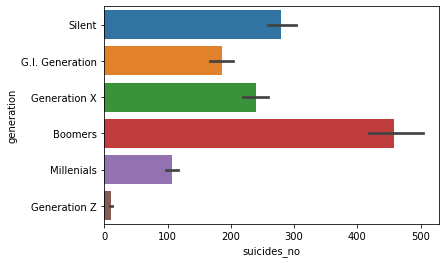

In [23]:
r = sns.barplot(x='suicides_no', y='generation', data=lista)

### ¿A que rango de edad pertenece cada generación?